# FFT sample

In [19]:
import pycuda.gpuarray as gpuarray
from pycuda.autoinit import context
import pycuda.driver as cuda
import pycuda.autoinit
import numpy as np
dev=cuda.Device(1)
dev.make_context()

import util.RotRep as Rot

from scipy.ndimage import gaussian_filter

In [20]:
import numpy as np
x15=np.load('/home/yufengs/SimData/g40_fac40/x.npy')
y15=np.load('/home/yufengs/SimData/g40_fac40/y.npy')
S15=np.load('/home/yufengs/SimData/g40_fac40/allMaxS.npy')

In [21]:
import h5py
a=h5py.File('/home/yufengs/SimData/grain_40_fac40.hdf5')
Lim=np.array(a['limits'])

In [25]:
from InitStrain import Initializer

from Simulator_GPU import StrainSimulator_GPU
Cfg=Initializer('ConfigFiles/g40.yml')
Cfg.SetPosOrien(a['Pos'],a['Orien'])
Cfg.Simulate()
sim=StrainSimulator_GPU( _NumG=Cfg.NumG,_Lim=Lim,
        _Det=Cfg.Det, _Gs=Cfg.Gs, _Info=Cfg.Info, _eng=Cfg.eng)
sim.loadGs()

<IPython.core.display.Javascript object>


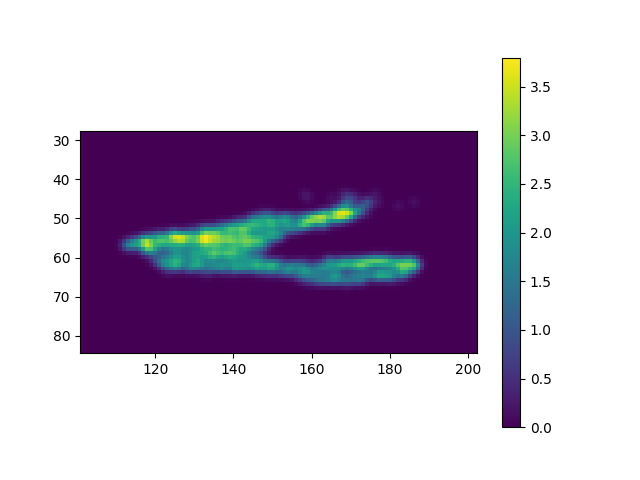

In [26]:
from collections import Counter
from scipy.sparse import coo_matrix
ii=2
mymap=np.zeros((Lim[ii][3]-Lim[ii][2],Lim[ii][1]-Lim[ii][0]))


xtmp,ytmp,otmp,maskH=sim.Simulate(x15,y15,S15,len(x15))

idx=np.where(otmp[:,ii]==13)[0]

myCounter=Counter(zip(xtmp[idx,ii],ytmp[idx,ii]))
val=list(myCounter.values())
xx,yy=zip(*(myCounter.keys()))

mymap=mymap+coo_matrix((val,(yy,xx)),shape=(Lim[ii][3]-Lim[ii][2],Lim[ii][1]-Lim[ii][0])).toarray()

import matplotlib.pyplot as plt
%matplotlib notebook
plt.imshow(gaussian_filter(mymap,sigma=1,mode='nearest',truncate=4))
plt.colorbar()
plt.show()

In [27]:
from scipy.stats import entropy

In [35]:
entropy([1,2,3],[2,4,0.0001])

4.807919406569953